In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

basic_flat = pd.read_csv("Baseline_summaries.csv")
fast_model = pd.read_csv("Fast_summaries.csv")
en_eff_model = pd.read_csv("Energy_summaries.csv")
rough_terr = pd.read_csv("Rough_summaries.csv")


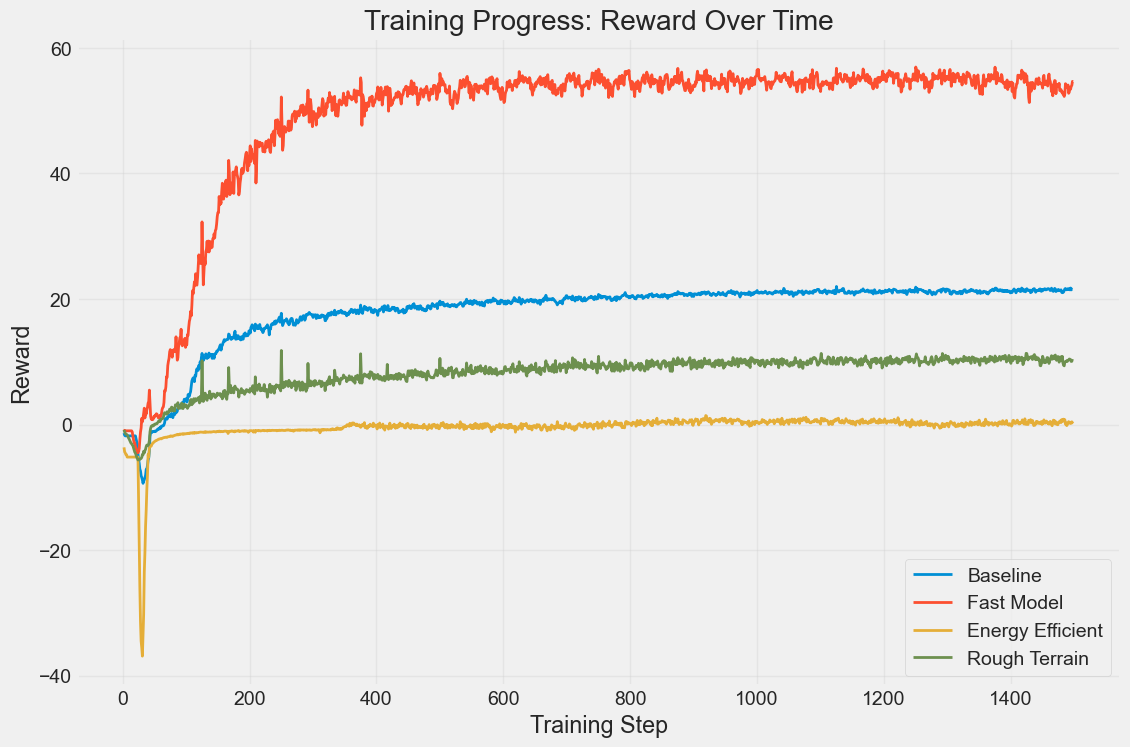

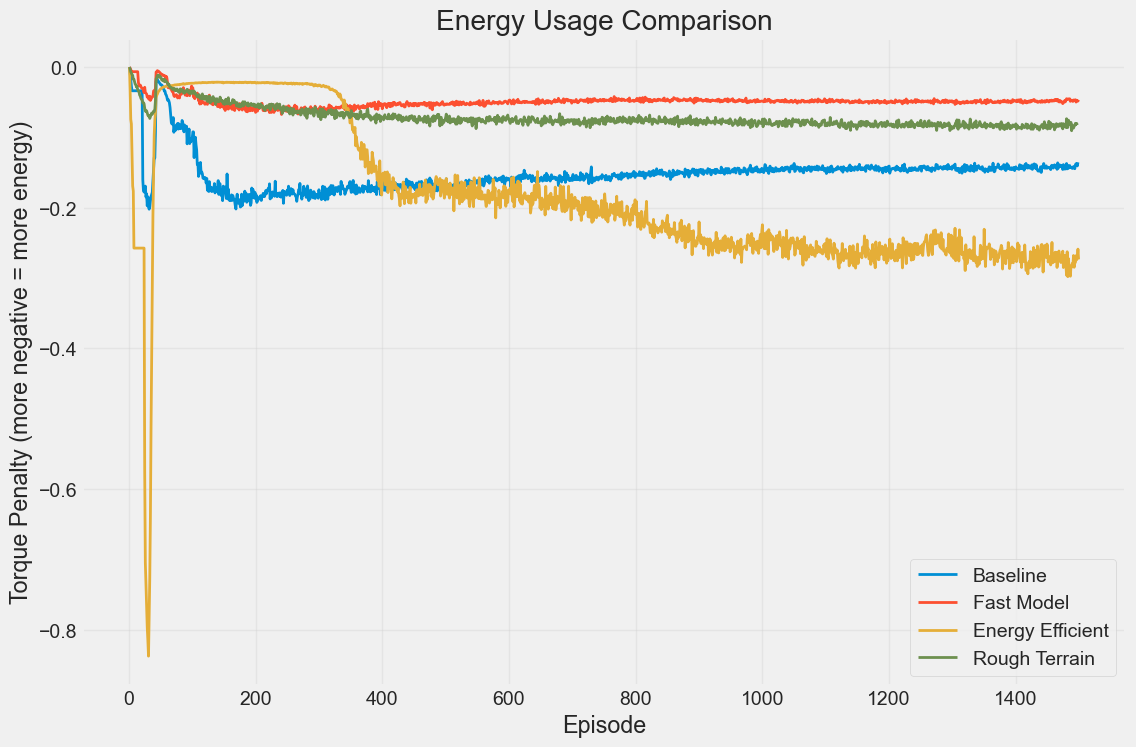

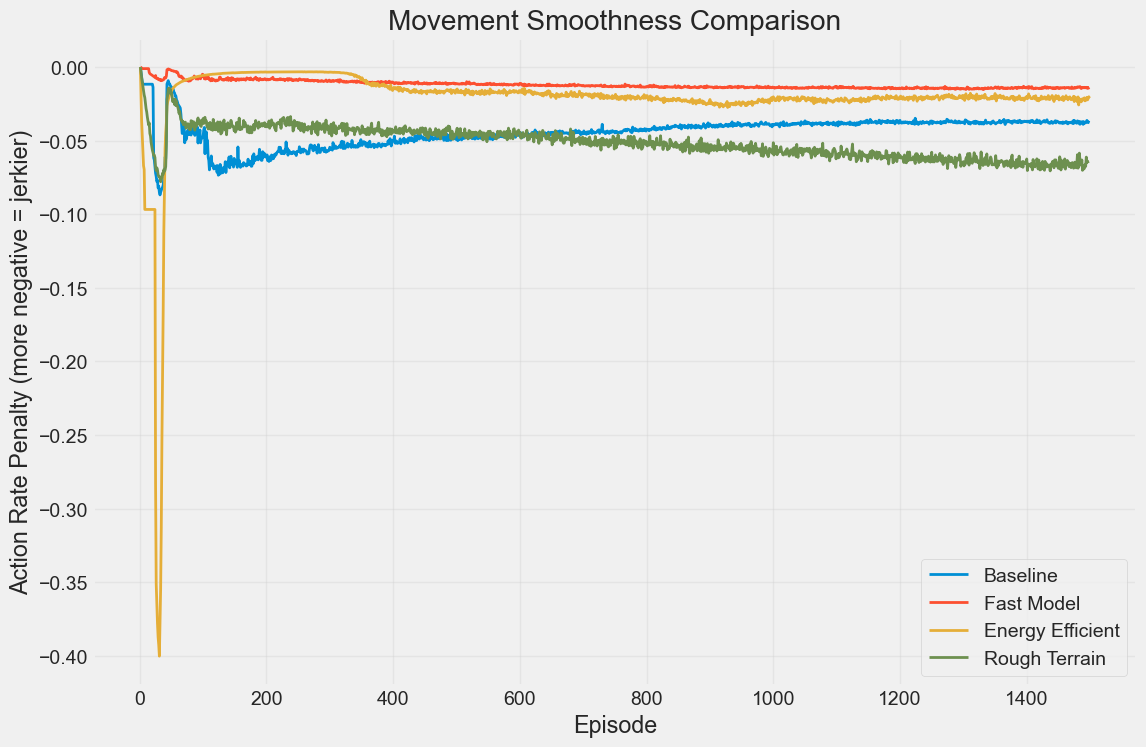


=== Final Performance Comparison ===
   Configuration  Final Reward  Avg Torque  Avg Smoothness  Final Velocity Error
        Baseline     21.542494   -0.151464       -0.044382              0.226063
      Fast Model     54.612045   -0.049154       -0.011936              0.234953
Energy Efficient      0.159568   -0.188491       -0.020813              1.313339
   Rough Terrain     10.427635   -0.071819       -0.051374              0.593919


In [32]:
# Set style
sns.set_style("dark")
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')

## 1. PRIMARY: Reward Comparison
fig, ax = plt.subplots()
for data, label in [(basic_flat, 'Baseline'), (fast_model, 'Fast Model'), 
                     (en_eff_model, 'Energy Efficient'), (rough_terr, 'Rough Terrain')]:
    rewards = data[data['tag'] == 'rewards/iter']
    ax.plot(rewards['step'], rewards['value'], label=label, linewidth=2)

ax.set_xlabel('Training Step')
ax.set_ylabel('Reward')
ax.set_title('Training Progress: Reward Over Time')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 2. Energy Efficiency Comparison
fig, ax = plt.subplots()
for data, label in [(basic_flat, 'Baseline'), (fast_model, 'Fast Model'), 
                     (en_eff_model, 'Energy Efficient'), (rough_terr, 'Rough Terrain')]:
    torques = data[data['tag'] == 'Episode/Episode_Reward/dof_torques_l2']
    ax.plot(torques['step'], torques['value'], label=label, linewidth=2)

ax.set_xlabel('Episode')
ax.set_ylabel('Torque Penalty (more negative = more energy)')
ax.set_title('Energy Usage Comparison')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 3. Movement Smoothness
fig, ax = plt.subplots()
for data, label in [(basic_flat, 'Baseline'), (fast_model, 'Fast Model'), 
                     (en_eff_model, 'Energy Efficient'), (rough_terr, 'Rough Terrain')]:
    smoothness = data[data['tag'] == 'Episode/Episode_Reward/action_rate_l2']
    ax.plot(smoothness['step'], smoothness['value'], label=label, linewidth=2)

ax.set_xlabel('Episode')
ax.set_ylabel('Action Rate Penalty (more negative = jerkier)')
ax.set_title('Movement Smoothness Comparison')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 4. Final Performance Summary Table
def get_final_value(data, tag):
    """Get the last value for a specific metric"""
    filtered = data[data['tag'] == tag]
    if len(filtered) > 0:
        return filtered['value'].iloc[-1]
    return None

def get_average_value(data, tag):
    """Get the average value for a specific metric"""
    filtered = data[data['tag'] == tag]
    if len(filtered) > 0:
        return filtered['value'].mean()
    return None

summary = {
    'Configuration': ['Baseline', 'Fast Model', 'Energy Efficient', 'Rough Terrain'],
    'Final Reward': [
        get_final_value(basic_flat, 'rewards/iter'),
        get_final_value(fast_model, 'rewards/iter'),
        get_final_value(en_eff_model, 'rewards/iter'),
        get_final_value(rough_terr, 'rewards/iter')
    ],
    'Avg Torque': [
        get_average_value(basic_flat, 'Episode/Episode_Reward/dof_torques_l2'),
        get_average_value(fast_model, 'Episode/Episode_Reward/dof_torques_l2'),
        get_average_value(en_eff_model, 'Episode/Episode_Reward/dof_torques_l2'),
        get_average_value(rough_terr, 'Episode/Episode_Reward/dof_torques_l2')
    ],
    'Avg Smoothness': [
        get_average_value(basic_flat, 'Episode/Episode_Reward/action_rate_l2'),
        get_average_value(fast_model, 'Episode/Episode_Reward/action_rate_l2'),
        get_average_value(en_eff_model, 'Episode/Episode_Reward/action_rate_l2'),
        get_average_value(rough_terr, 'Episode/Episode_Reward/action_rate_l2')
    ],
    'Final Velocity Error': [
        get_final_value(basic_flat, 'Episode/Metrics/base_velocity/error_vel_xy'),
        get_final_value(fast_model, 'Episode/Metrics/base_velocity/error_vel_xy'),
        get_final_value(en_eff_model, 'Episode/Metrics/base_velocity/error_vel_xy'),
        get_final_value(rough_terr, 'Episode/Metrics/base_velocity/error_vel_xy')
    ]
}

summary_df = pd.DataFrame(summary)
print("\n=== Final Performance Comparison ===")
print(summary_df.to_string(index=False))
